In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm
import matplotlib.colors

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)

In [3]:
# delete_all()

In [4]:
ensemble = 250000

df = load_result(conditions=get_conditions(
    N_particle = 1,
    N_ensemble = ensemble,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = 100000,
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,time
7653,f02757,1,250000,0.001,0.0010,3.0,40,1.0,0.001000,1.0,5.0,5.0,0.001,10000,100000,"[-7.0, -7.0, 0.0, -7.0, -6.0, -5.0, 3.0, -3.0,...",1220.001707
5929,a1434f,1,250000,0.001,0.0010,3.0,40,1.0,0.001259,1.0,5.0,5.0,0.001,10000,100000,"[-5.0, 5.0, 5.0, -7.0, -5.0, -1.0, -3.0, 2.0, ...",1212.901926
7881,d25c66,1,250000,0.001,0.0010,3.0,40,1.0,0.001585,1.0,5.0,5.0,0.001,10000,100000,"[0.0, -1.0, 4.0, 1.0, 5.0, 10.0, -2.0, 7.0, 9....",1215.854613
3274,2ff692,1,250000,0.001,0.0010,3.0,40,1.0,0.001995,1.0,5.0,5.0,0.001,10000,100000,"[5.0, 1.0, -3.0, 10.0, -4.0, -3.0, -6.0, -3.0,...",1215.422150
12,5d0843,1,250000,0.001,0.0010,3.0,40,1.0,0.002512,1.0,5.0,5.0,0.001,10000,100000,"[4.0, 3.0, 8.0, 2.0, -1.0, -1.0, -3.0, 0.0, -2...",1246.849441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,560c07,1,250000,10.000,0.2512,3.0,40,1.0,0.012590,1.0,5.0,5.0,0.001,10000,100000,"[-59.0, -81.0, 267.0, -12.0, -95.0, 12.0, -151...",1131.820368
8988,2021a6,1,250000,10.000,0.2512,3.0,40,1.0,0.015850,1.0,5.0,5.0,0.001,10000,100000,"[26.0, 50.0, -222.0, 106.0, -171.0, -90.0, 106...",1136.196524
3547,e83af8,1,250000,10.000,0.2512,3.0,40,1.0,0.019950,1.0,5.0,5.0,0.001,10000,100000,"[87.0, -197.0, 182.0, -10.0, -212.0, -341.0, -...",1099.176347
3126,d8e3f9,1,250000,10.000,0.2512,3.0,40,1.0,0.025120,1.0,5.0,5.0,0.001,10000,100000,"[-14.0, 298.0, -128.0, -151.0, -146.0, 68.0, 7...",1136.342827


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['f02757', 'a1434f', 'd25c66', '2ff692', '5d0843', '236df5', '061da4', '6db1b4', '527f6d', '2ece93', '04cfdd', 'ef41fa', '758bd0', 'b0b947', 'fee01f', 'e4b47a', 'dc8705', 'ea6d93', '86e4d6', 'f36360', 'db347b', '1118c8', '1ad67a', '6470c8', '33875d', '15200c', '2268e4', '6ac83f', 'ffe6d8', '6757e9', '372c94', 'd0e626', '8b0fd7', '4b3d3b', 'c4811b', '42d32e', 'eab4a1', 'c42b25', '605455', '9a74ef', 'e2e7bb', '961c9e', '9405d1', '240aa8', '781f42', 'e1e266', '78c560', '1d14b7', '9f2907', '806d30', '78b6c0', '65e879', 'fa5292', 'b14914', 'bf5529', '407cbc', '2e428e', '9b31e2', '38e5ab', '6815d3', '77eecb', '70f935', '039d65', '376bbe', 'f12dca', '14dce9', '6f1908', '97460e', 'ae5904', '0d3ec0', '74e3c0', 'fd2c71', '708eb7', 'eb18c3', '1c2430', '7732e2', 'ea5631', 'a3cf09', 'ffff2f', 'bd4648', '76bc06', '4673ef', '724a80', '4d1641', 'd2f73a', '01dce1', 'cb499d', '5b6600', '8d47b7', '023fef', 'fe136a', '944d1e', 'cf41d8', 'db0235', '98efef', '4f44e4', '5c4f81', '3e35da', 'bb5ad1', 'b907a3',

In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")
print(f"velocity = {available_velocity}")

data = 41 x 25 x 9 = 9225
slope = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0]
Lambda = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02512, 0.03162, 0.03981, 0.05012, 0.0631, 0.07943, 0.1, 0.1259, 0.1585, 0.1995, 0.2512]
velocity = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0]


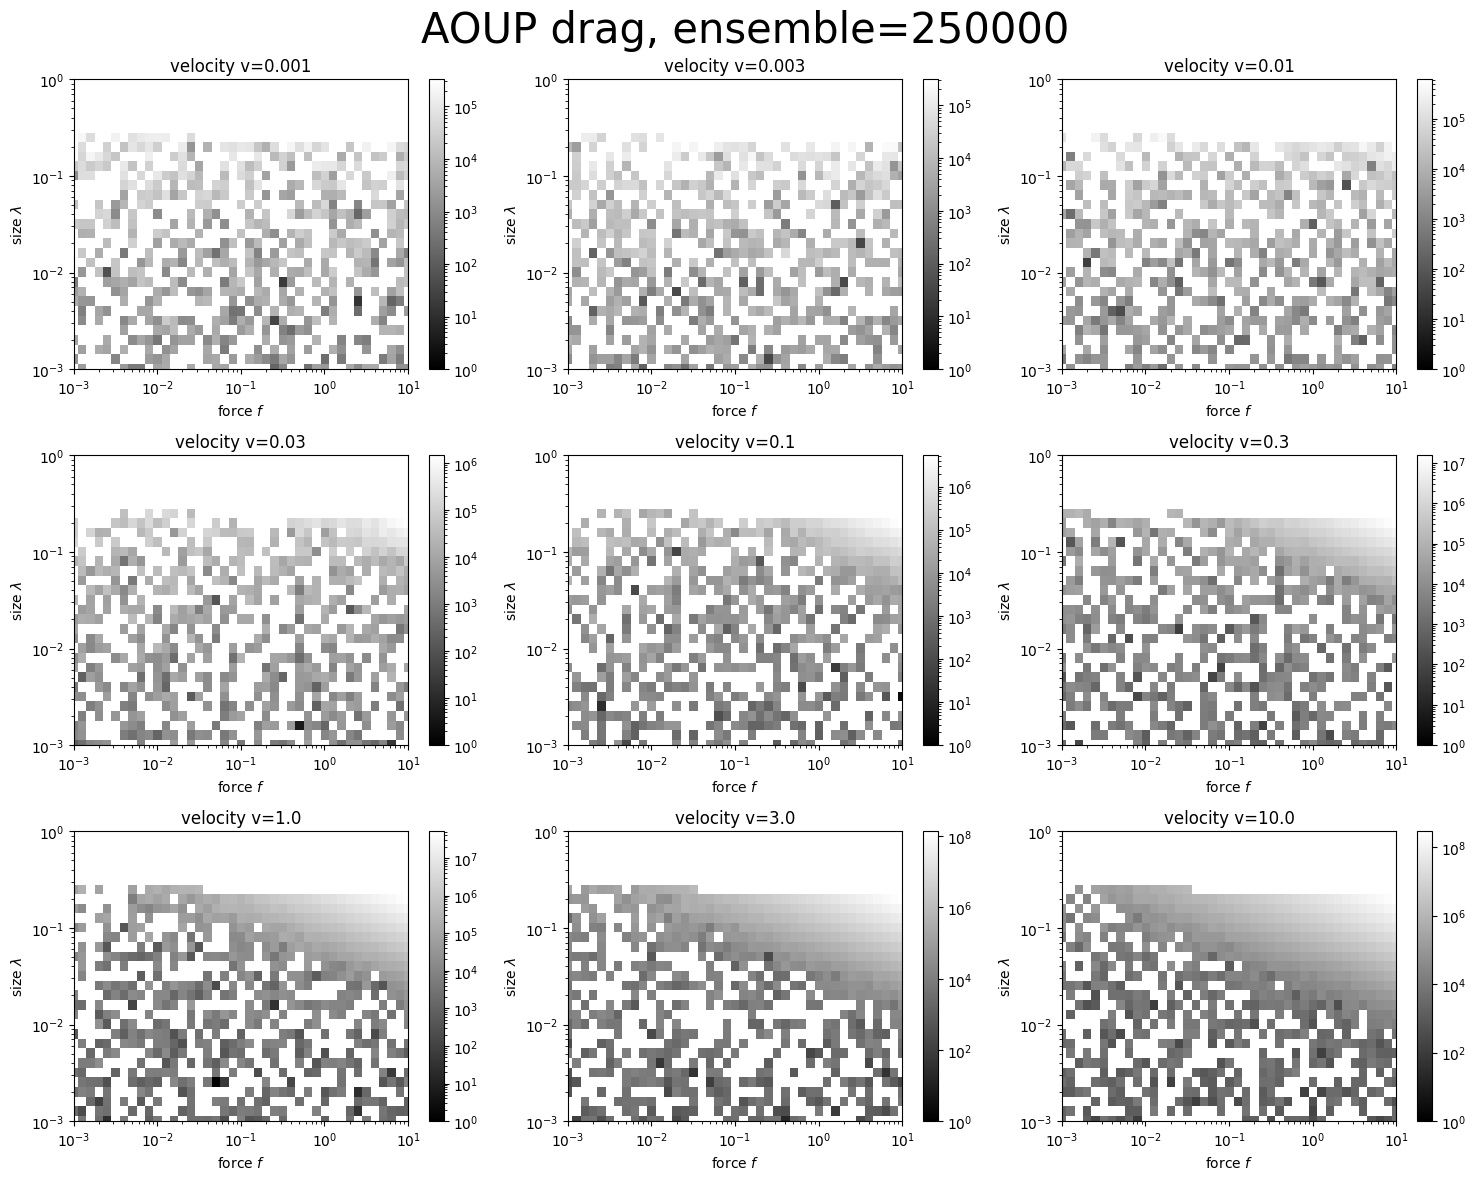

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity)
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary_r")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, ensemble={ensemble}.jpg")
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:194: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:195: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


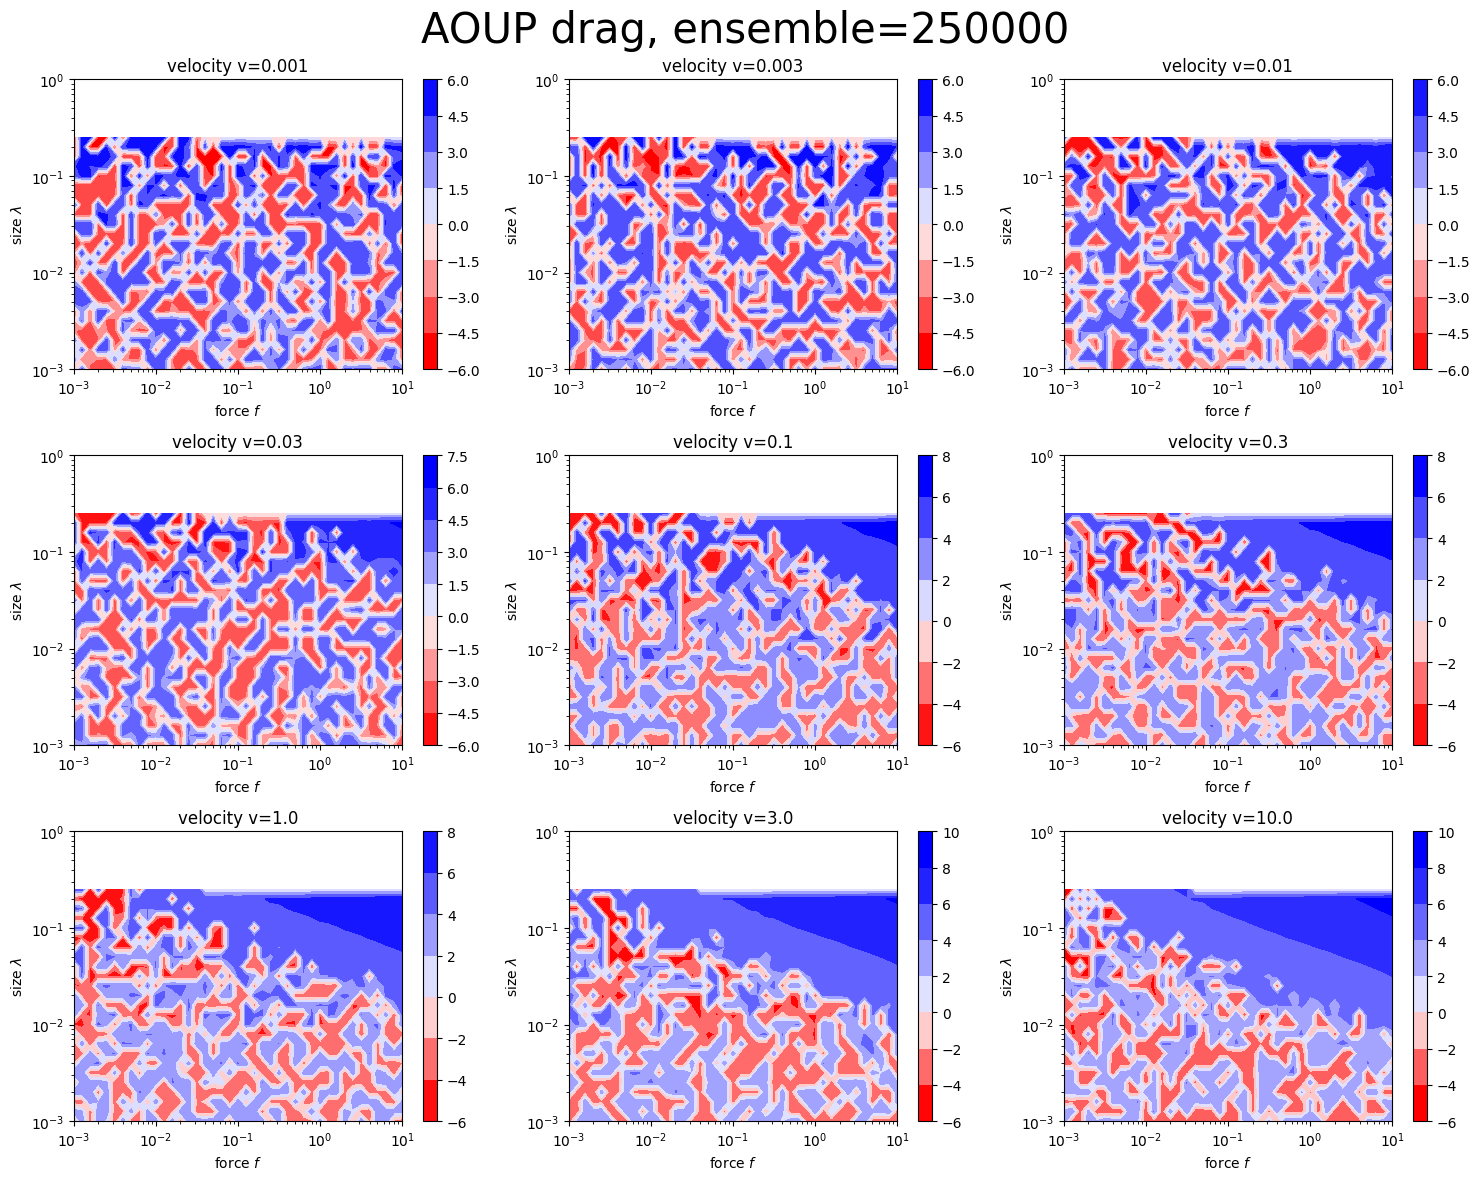

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity)

    cvals  = [data.min(), 0, data.max()]
    colors = ["red","white","blue"]
    norm = plt.Normalize(min(cvals),max(cvals))
    tuples = list(zip(map(norm,cvals), colors))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

    c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    # c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/AOUP drag, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_35095/1022201050.py:12: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


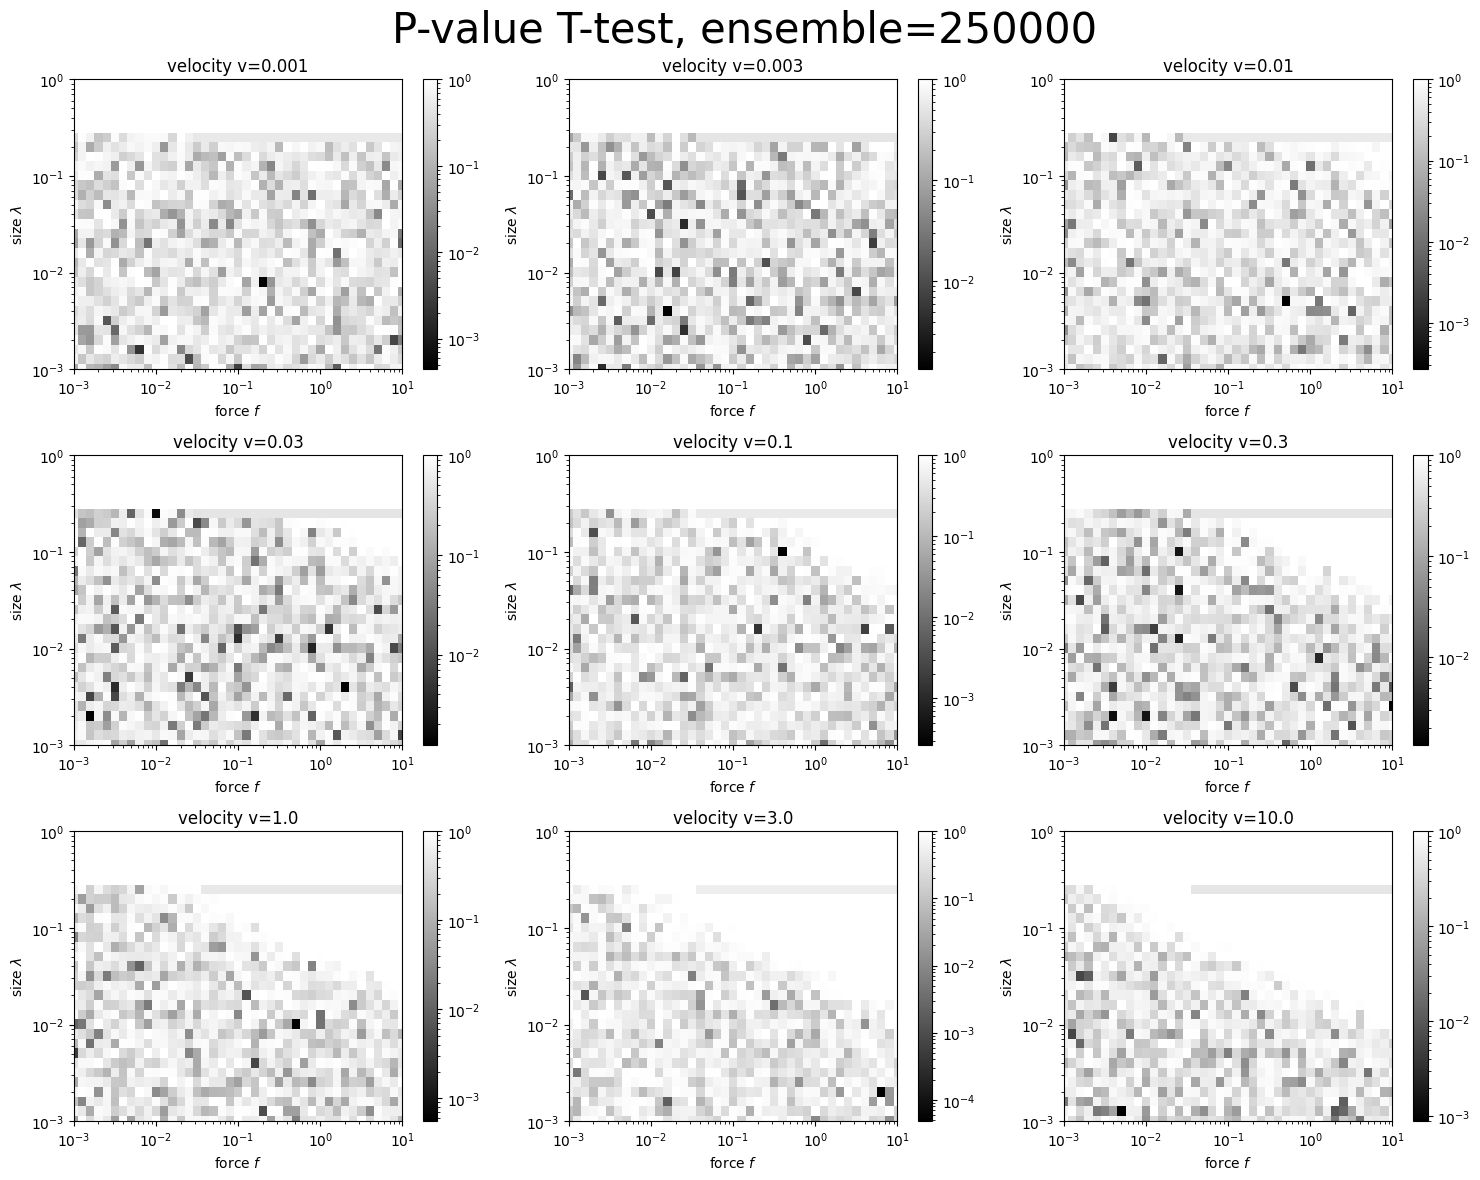

In [9]:
from scipy.stats import norm

fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"P-value T-test, ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity)
    std = get_std_by_velocity(df, velocity=velocity)

    Z = drag / std
    Z[np.isnan(Z)] = 0.0

    p_value = norm.cdf(Z)
    # print(p_value)
    # print(p_value.min())

    # c = ax.contourf(available_slope, available_Lambda, p_value,
    #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim([1.e-3, 1.e+1])
    ax.set_ylim([1.e-3, 1])

    cbar = plt.colorbar(c)

fig.tight_layout()
plt.savefig(f"./fig/T-Test p-value, ensemble={ensemble}.jpg")
plt.show()

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

7.706966913988757 5.321186100302054


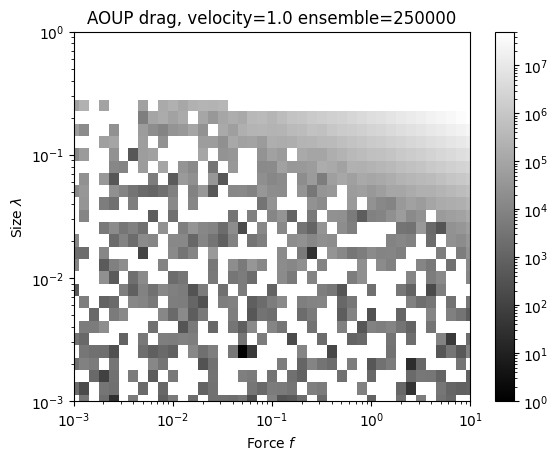

In [11]:
fig, ax = plt.subplots()
velocity = 1.0

drag = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary_r")
# c = ax.pcolor(x, y, average, shading="auto",
#                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:194: RuntimeWarning: invalid value encountered in divide
  pm_flag = drag/np.abs(drag)
/pds/pds31/sungbinlee/Research/AOUP/manage_data.py:195: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(np.abs(drag))


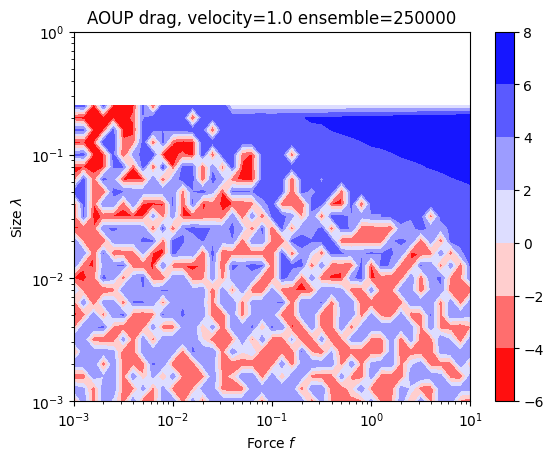

In [12]:
fig, ax = plt.subplots()

data = get_log_scale(df, velocity=velocity)

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_35095/2087789733.py:6: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


0.0005550823099031429


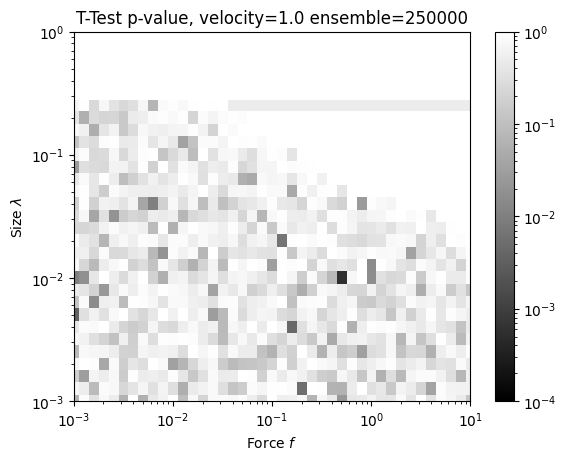

In [13]:
from scipy.stats import norm

drag = get_drag_by_velocity(df, velocity=velocity)
std = get_std_by_velocity(df, velocity=velocity)

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)
# print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=LogNorm(vmin=1.e-4, vmax=1), cmap="binary_r")

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()